*FORECASTING*

eksplorasi data serta membuat alat prediksi curah hujan untuk 3 hari yang akan mendatang/lebih

In [ ]:
import pandas as pd
import re

In [ ]:
file19 = 'C:/Users/nalia-pc/Dropbox/PC/Documents/===KULIAH===/PKL/F2019.xlsx'
file20 = 'C:/Users/nalia-pc/Dropbox/PC/Documents/===KULIAH===/PKL/F2020.xlsx'
file21 = 'C:/Users/nalia-pc/Dropbox/PC/Documents/===KULIAH===/PKL/F2021.xls'
files = [file19, file20, file21]
# y = ['19', '20', '21']
m = ['JAN', 'FEB', 'MAR', 'APR', 'MEI', 'JUN', 'JUL', 'AGS', 'SEPT', 'OKT', 'NOV', 'DES']
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
years = ['2019', '2020', '2021']

Details :

- tgl         : tanggal
- temp*       : suhu pada jam * WIB
- temp_avg    : rata2 suhu
- temp_24     : rata2 suhu 24 jam
- temp_max    : suhu max
- temp_min    : suhu min
- CH          : Curah hujan dalam mm jam 7 WIB
- light_hour  : lama penyinaran matahari dalam jam (08.00-16.00)
- light_per   : lama penyinaran matahari (%) (08.00-16.00)
- pck         : peristiwa cuaca khusus
----------------------------------------------------
- tgl           : tanggal
- press         : tekanan udara (mb)
- humid*        : lembab NISBI (%)
- humid_avg     : rata-rata kelembapan
- humid_24     : rata-rata kelembapan 24j
- ws_avg        : kecepatan rata2 angin (Knot)
- mod_dir       : arah terbanyak
- max_ws        : kecepatan angin terbesar (Knot)
- dir           : arah angin

In [ ]:
xl = pd.ExcelFile('F2019.xlsx')

regex = re.compile('JAN')

sheets = [n for n in xl.sheet_names if regex.match(n)]
# ['matching_sheet1', 'matching_sheet2']

dfs = pd.read_excel(xl, sheet_name=sheets)
key = list(dfs.keys())[0]
print(key)

In [ ]:
df = pd.DataFrame()
y_dex = 0
for i in files:
    x_dex = 0
    xl = pd.ExcelFile(i)
    for month in months:
        regex = re.compile(m[month-1])
        sheets = [n for n in xl.sheet_names if regex.match(n)]
        dic = pd.read_excel(xl, sheet_name=sheets)
        sheet_k = list(dic.keys())[0]
        
        data_1 = pd.read_excel(i,
                                sheet_name= sheet_k,
                                header = 19,
                                nrows = 33,
                                usecols = 'A:L',
                                names=['tgl', 'temp7', 'temp13', 'temp18', 'temp_avg','temp_24', 'temp_max', 'temp_min', 'CH', 'light_hour', 'light_per', 'pck']
                                )
        data_2 = pd.read_excel(i,
                                sheet_name= sheet_k,
                                header = 6,
                                nrows = 33,
                                usecols = 'M:U,W:X',
                                names=['tgl', 'press', 'humid7', 'humid13', 'humid18', 'humid_avg', 'humid_24', 'ws_abg', 'mod_dir', 'max_ws', 'dir']
                                )
       
        # datas = pd.merge(data_1, data_2, on='tgl', how='left')
        datas = pd.concat([data_1, data_2], axis=1, join='inner')
        datas.dropna(axis = 0, subset=['tgl'], inplace = True)
        datas.insert(0, 'Bulan', str(month))
        datas.insert(0, 'Tahun', str(years[y_dex]))
        print(datas.tail())
        df = pd.concat([df,datas], ignore_index=True)
        x_dex += 1
    y_dex += 1


In [ ]:
df.isna().sum()

In [ ]:
df

In [1]:
# save structured data to csv

# df.to_csv('Clean_Weather.csv', index=False, encoding='utf-8-sig')

-------------------------------------------------------------------------------------------------------------------------
# Data Cleaning

- Data Kosong dalam dataframe menunjukkan ketidakhadiran variabel pada hari tersebut.

- TTU merupakan keadaan dimana hujan terjadi namun dikarenakan sangat kecil maka tidak dapat terukur, sehingga perlu didiskusikan lagi apakah perlu dituliskan '0' atau nilai yang sangat kecil seperti '0.01'

- tanda '-' menandakan bahwa tidak adanya hujan sehingga akan dikonversi ke nilai '0'

- pck memiliki beberapa data yang kosong yang berarti tidak adanya kejadian khsusu pada hari tersebut.

In [93]:
import pandas as pd
df = pd.read_csv('/kaggle/input/weather-prediction/Clean_Weather.csv')
df.head()

,Tahun,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,...,press,humid7,humid13,humid18,humid_avg,humid_24,ws_abg,mod_dir,max_ws,dir
0,2019,1,1.0,27.4,33.2,29.8,29.5,29.7,33.8,26.8,...,1010.3,78.6505836125575,54.836446564128074,74.27096201770802,72.0,71.0,5.75,BL,10.0,290.0
1,2019,1,2.0,28.2,34.4,26.0,29.2,28.5,34.8,25.2,...,1010.6,73.40380157973996,53.68666285089573,93.47656840107817,73.0,77.0,3.7916666666666665,B,16.0,340.0
2,2019,1,3.0,25.4,31.3,26.6,27.2,27.2,31.7,24.8,...,1011.4,94.20347210821006,64.95247934343949,87.31227976924256,85.0,83.0,2.875,B,12.0,330.0
3,2019,1,4.0,25.4,31.4,29.6,28.0,28.3,32.1,25.0,...,1012.5,91.76423123386563,66.24430228261507,76.86944439631735,82.0,82.0,3.0,U,12.0,360.0
4,2019,1,5.0,27.6,33.0,30.6,29.7,29.7,33.4,26.8,...,1014.1,86.08433224972319,60.26014815147468,70.13680564800549,76.0,76.0,3.5,U,15.0,350.0


In [94]:
df.isna().sum()

Tahun          0
Bulan          0
tgl            0
temp7          0
temp13         0
temp18         0
temp_avg       0
temp_24        0
temp_max       0
temp_min       0
CH             0
light_hour     0
light_per      0
pck           30
tgl.1          0
press          0
humid7         0
humid13        0
humid18        0
humid_avg      0
humid_24       0
ws_abg         0
mod_dir        0
max_ws         0
dir            0
dtype: int64

In [95]:
display(df.iloc[845])

Tahun         2021
Bulan            4
tgl               
temp7             
temp13            
temp18            
temp_avg          
temp_24           
temp_max          
temp_min          
CH                
light_hour        
light_per         
pck               
tgl.1             
press             
humid7            
humid13           
humid18           
humid_avg         
humid_24          
ws_abg            
mod_dir           
max_ws            
dir               
Name: 845, dtype: object

In [96]:
i = df[(df.tgl == ' ')].index
df = df.drop(i)
df = df.fillna(0)

In [97]:
col_list = ['-', 'TTU']
for i in col_list:
    count = df.CH.str.contains(i).sum()
    print(i, ':', count)

- : 676
TTU : 54


In [98]:
df.loc[df['CH'] == '-', 'CH'] = 0
df.loc[df['CH'] == 'TTU', 'CH'] = 0.01

In [99]:
col_list = ['-', 'TTU']
for i in col_list:
    count = df.CH.str.contains(i).sum()
    print(i, ':', count)

- : 0
TTU : 0


In [100]:
df.isna().sum()

Tahun         0
Bulan         0
tgl           0
temp7         0
temp13        0
temp18        0
temp_avg      0
temp_24       0
temp_max      0
temp_min      0
CH            0
light_hour    0
light_per     0
pck           0
tgl.1         0
press         0
humid7        0
humid13       0
humid18       0
humid_avg     0
humid_24      0
ws_abg        0
mod_dir       0
max_ws        0
dir           0
dtype: int64

In [101]:
cols = ['tgl', 'temp7', 'temp13', 'temp18', 'temp_avg','temp_24', 'temp_max', 'temp_min', 'CH', 'light_hour', 'light_per', 'press', 'humid7', 'humid13', 'humid18', 'humid_avg', 'humid_24', 'ws_abg', 'max_ws', 'dir']
for i in cols:    
    df[i] = df[i].astype(str).astype(float)

In [102]:
df.dtypes

Tahun           int64
Bulan           int64
tgl           float64
temp7         float64
temp13        float64
temp18        float64
temp_avg      float64
temp_24       float64
temp_max      float64
temp_min      float64
CH            float64
light_hour    float64
light_per     float64
pck            object
tgl.1          object
press         float64
humid7        float64
humid13       float64
humid18       float64
humid_avg     float64
humid_24      float64
ws_abg        float64
mod_dir        object
max_ws        float64
dir           float64
dtype: object

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

In [162]:
df['CH'].describe()

count    1090.000000
mean        5.032606
std        12.955329
min         0.000000
25%         0.000000
50%         0.000000
75%         2.300000
max       101.800000
Name: CH, dtype: float64

In [166]:
dff = df.groupby(["Tahun"]).CH.describe().reset_index()

In [167]:
dff

,Tahun,count,mean,std,min,25%,50%,75%,max
0,2019,365.0,3.834301,12.616116,0.0,0.0,0.0,0.01,101.0
1,2020,360.0,5.609444,12.890317,0.0,0.0,0.0,4.00,101.8
2,2021,365.0,5.661973,13.301428,0.0,0.0,0.0,3.50,89.3


Total Curah Hujan per tahun

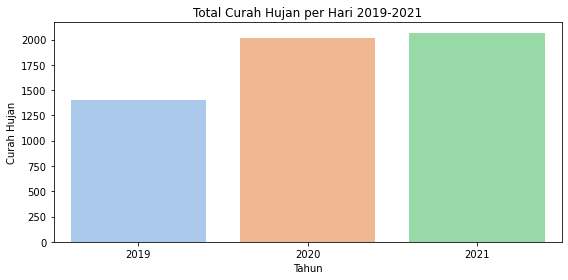

In [177]:
dff = df.groupby(["Tahun"]).CH.sum().reset_index()
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=dff['Tahun'], y=dff['CH'], palette='pastel', ci=None)
ax.set(title='Total Curah Hujan per Hari 2019-2021', xlabel='Tahun', ylabel='Curah Hujan')
plt.show()

In [107]:
df['date'] = pd.to_datetime(dict(year=df.Tahun, month=df.Bulan, day=df.tgl))

In [108]:
df.head()

,Tahun,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,...,humid7,humid13,humid18,humid_avg,humid_24,ws_abg,mod_dir,max_ws,dir,date
0,2019,1,1.0,27.4,33.2,29.8,29.5,29.7,33.8,26.8,...,78.650584,54.836447,74.270962,72.0,71.0,5.750000,BL,10.0,290.0,2019-01-01
1,2019,1,2.0,28.2,34.4,26.0,29.2,28.5,34.8,25.2,...,73.403802,53.686663,93.476568,73.0,77.0,3.791667,B,16.0,340.0,2019-01-02
2,2019,1,3.0,25.4,31.3,26.6,27.2,27.2,31.7,24.8,...,94.203472,64.952479,87.312280,85.0,83.0,2.875000,B,12.0,330.0,2019-01-03
3,2019,1,4.0,25.4,31.4,29.6,28.0,28.3,32.1,25.0,...,91.764231,66.244302,76.869444,82.0,82.0,3.000000,U,12.0,360.0,2019-01-04
4,2019,1,5.0,27.6,33.0,30.6,29.7,29.7,33.4,26.8,...,86.084332,60.260148,70.136806,76.0,76.0,3.500000,U,15.0,350.0,2019-01-05


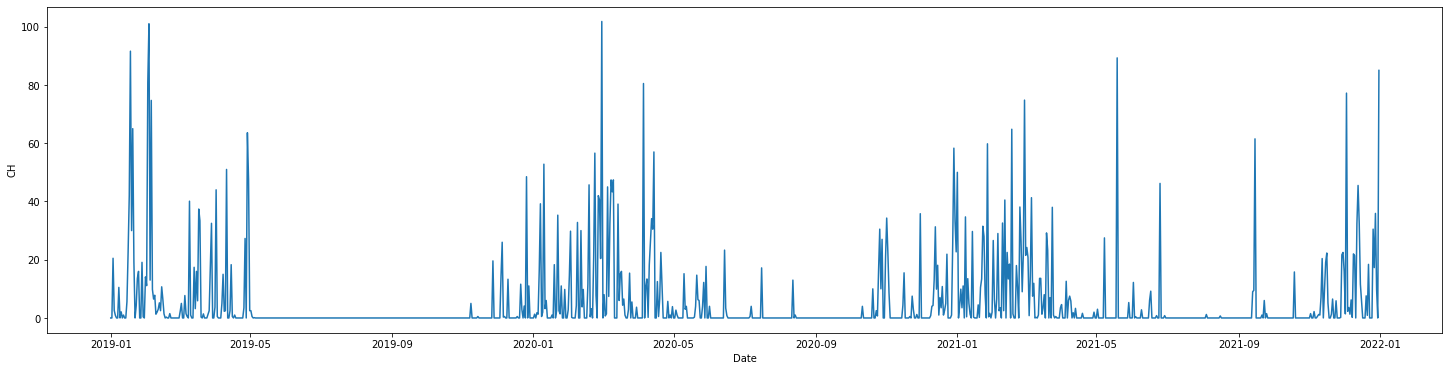

In [109]:
#Timeseries plot 2019-2021

plt.figure(figsize=(25,6))
plt.plot(df["date"], df["CH"])
plt.xlabel("Date")
plt.ylabel("CH")
plt.show()

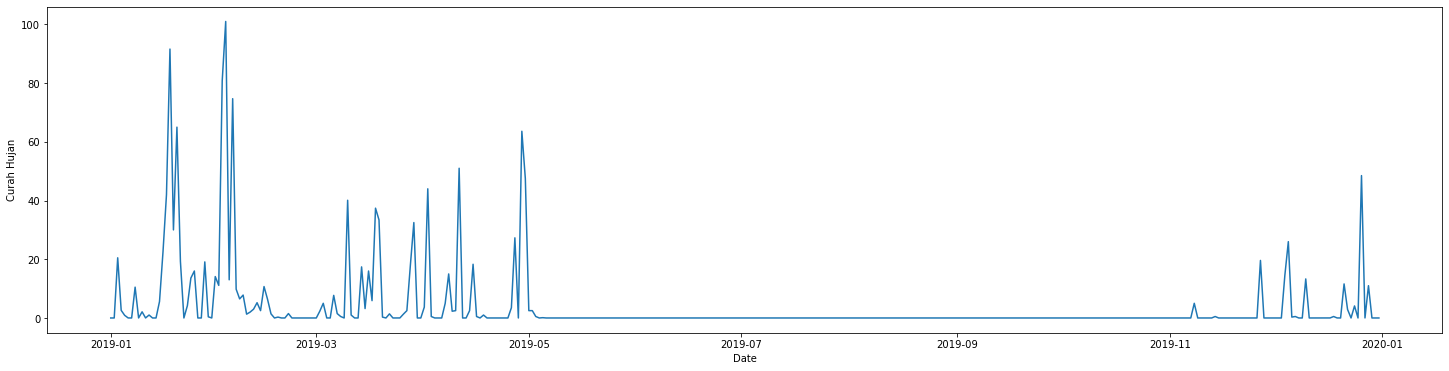

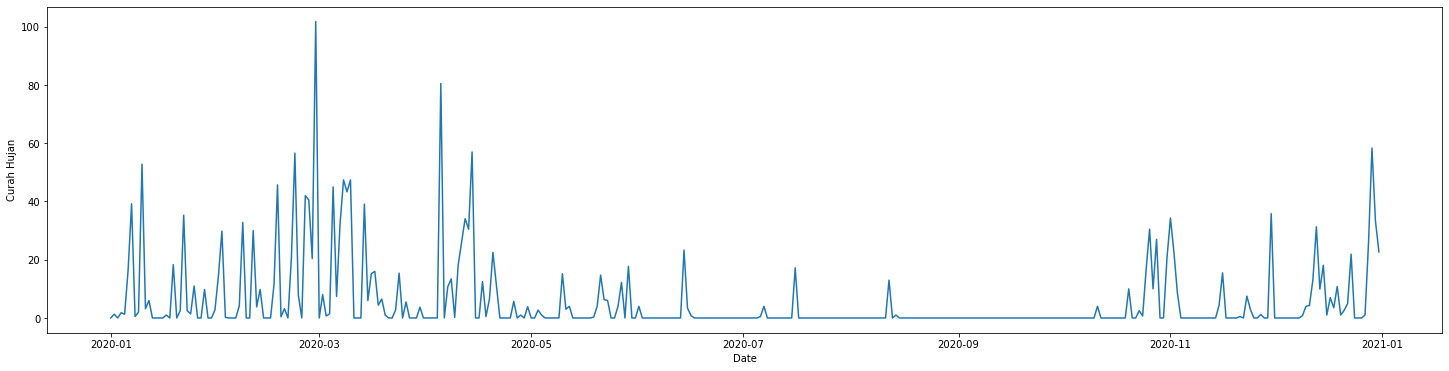

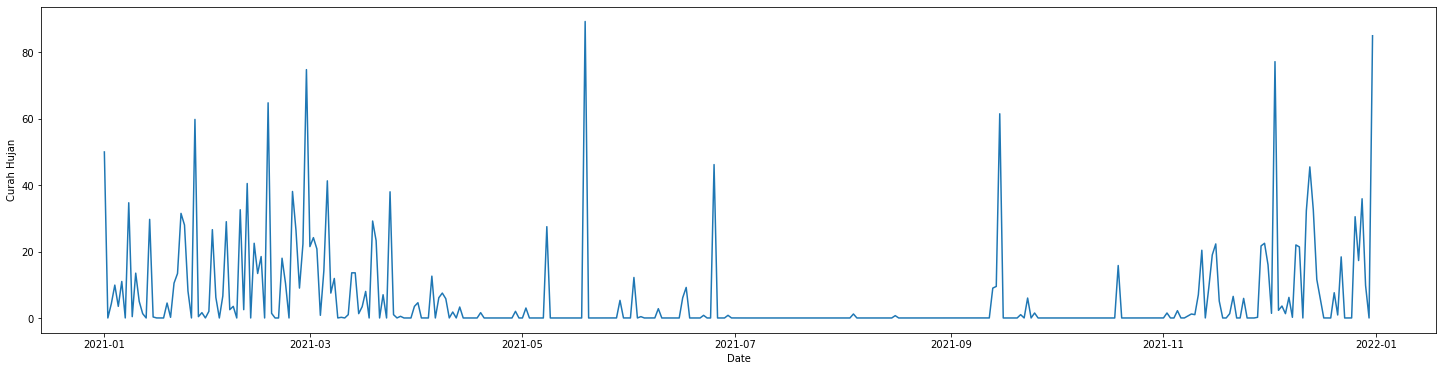

In [110]:
#Timeseries plot yearly
df19 = df.loc[df['Tahun'] == 2019]
df20 = df.loc[df['Tahun'] == 2020]
df21 = df.loc[df['Tahun'] == 2021]
all_df = [df19, df20, df21]
# create line plot of sales data
for i in all_df:
    plt.figure(figsize=(25,6))
    plt.plot(i["date"], i["CH"])
    plt.xlabel("Date")
    plt.ylabel("Curah Hujan")
    plt.show()

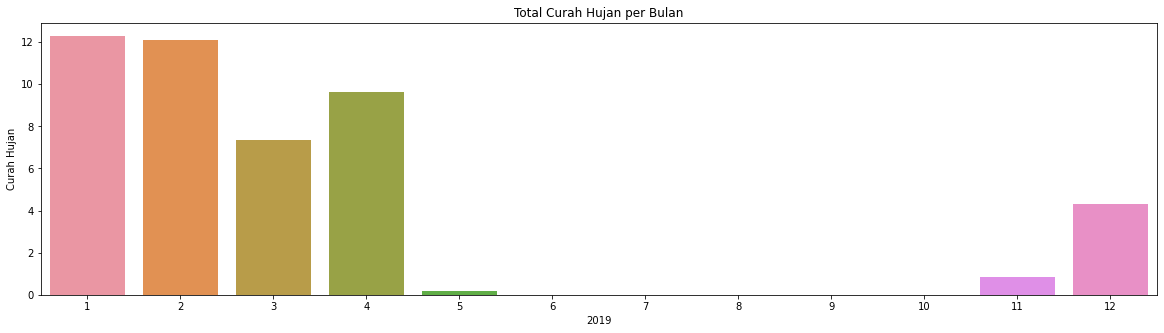

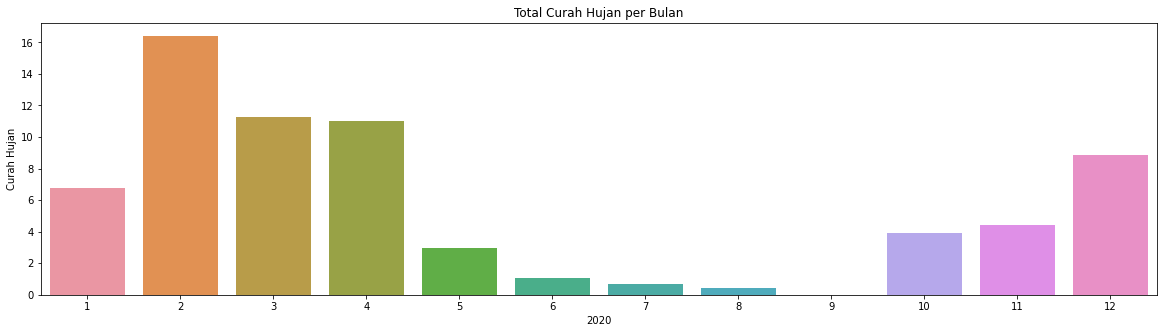

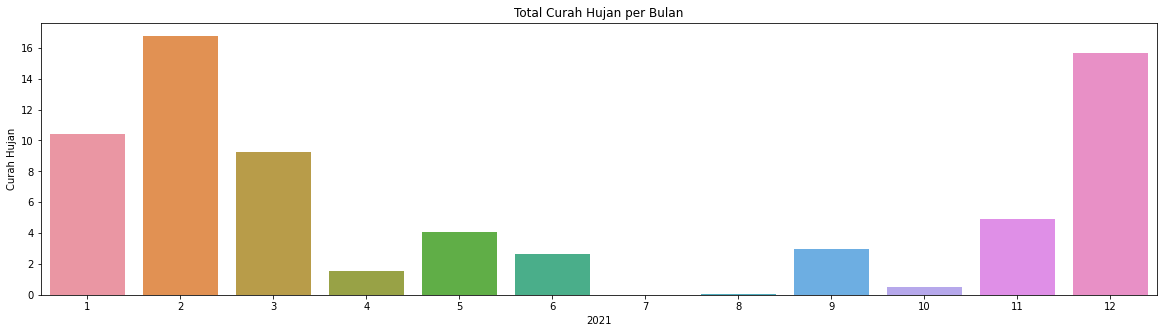

In [184]:
import seaborn as sns

#Timeseries plot yearly
df19 = df.loc[df['Tahun'] == 2019]
df20 = df.loc[df['Tahun'] == 2020]
df21 = df.loc[df['Tahun'] == 2021]
all_df = [df19, df20, df21]
# create line plot of sales data
for i in all_df:
    fig, ax = plt.subplots(figsize=(20,5))
    pl = sns.barplot(data=i, x='Bulan', y="CH",ci=None, 
                ax = ax)
    pl.set(title='Total Curah Hujan per Bulan', xlabel=i['Tahun'].iloc[0], ylabel='Curah Hujan')

# Correlation between variables

In [112]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [113]:
### direction of the wind
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['mod_dir']]).toarray())
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
df2 = pd.concat([df.reset_index(drop=True), encoder_df], axis='columns')

#view final df
print(df2)

      Tahun  Bulan   tgl  temp7  temp13  temp18  temp_avg  temp_24  temp_max  \
0      2019      1   1.0   27.4    33.2    29.8      29.5     29.7      33.8   
1      2019      1   2.0   28.2    34.4    26.0      29.2     28.5      34.8   
2      2019      1   3.0   25.4    31.3    26.6      27.2     27.2      31.7   
3      2019      1   4.0   25.4    31.4    29.6      28.0     28.3      32.1   
4      2019      1   5.0   27.6    33.0    30.6      29.7     29.7      33.4   
...     ...    ...   ...    ...     ...     ...       ...      ...       ...   
1085   2021     12  27.0   27.9    34.7    25.9      29.1     27.2      35.7   
1086   2021     12  28.0   26.4    33.6    27.4      28.5     27.7      35.8   
1087   2021     12  29.0   26.3    32.7    30.4      28.9     29.0      34.0   
1088   2021     12  30.0   27.0    32.2    25.4      27.9     27.8      33.4   
1089   2021     12  31.0   26.3    33.0    25.2      27.7     27.5      33.8   

      temp_min  ...    dir       date  

## 

In [114]:
list = df['pck'].values.tolist()
list[0]

'     '

In [115]:
df['pck']=df['pck'].replace([list[0],0],'None')
### PCK
encoder_df2 = pd.DataFrame(encoder.fit_transform(df[['pck']]).toarray())
encoder_df2.columns = encoder.get_feature_names_out()
encoder_df2.columns = encoder_df2.columns.str.replace(' ', '')

#merge one-hot encoded columns back with original DataFrame
df2 = pd.concat([df2.reset_index(drop=True), encoder_df2], axis='columns')

#view final df
print(df2)

      Tahun  Bulan   tgl  temp7  temp13  temp18  temp_avg  temp_24  temp_max  \
0      2019      1   1.0   27.4    33.2    29.8      29.5     29.7      33.8   
1      2019      1   2.0   28.2    34.4    26.0      29.2     28.5      34.8   
2      2019      1   3.0   25.4    31.3    26.6      27.2     27.2      31.7   
3      2019      1   4.0   25.4    31.4    29.6      28.0     28.3      32.1   
4      2019      1   5.0   27.6    33.0    30.6      29.7     29.7      33.4   
...     ...    ...   ...    ...     ...     ...       ...      ...       ...   
1085   2021     12  27.0   27.9    34.7    25.9      29.1     27.2      35.7   
1086   2021     12  28.0   26.4    33.6    27.4      28.5     27.7      35.8   
1087   2021     12  29.0   26.3    32.7    30.4      28.9     29.0      34.0   
1088   2021     12  30.0   27.0    32.2    25.4      27.9     27.8      33.4   
1089   2021     12  31.0   26.3    33.0    25.2      27.7     27.5      33.8   

      temp_min  ...  mod_dir_TL  mod_di

In [116]:
corr_df2 = df2.drop(['Tahun', 'tgl', 'tgl.1', 'date'], axis=1)

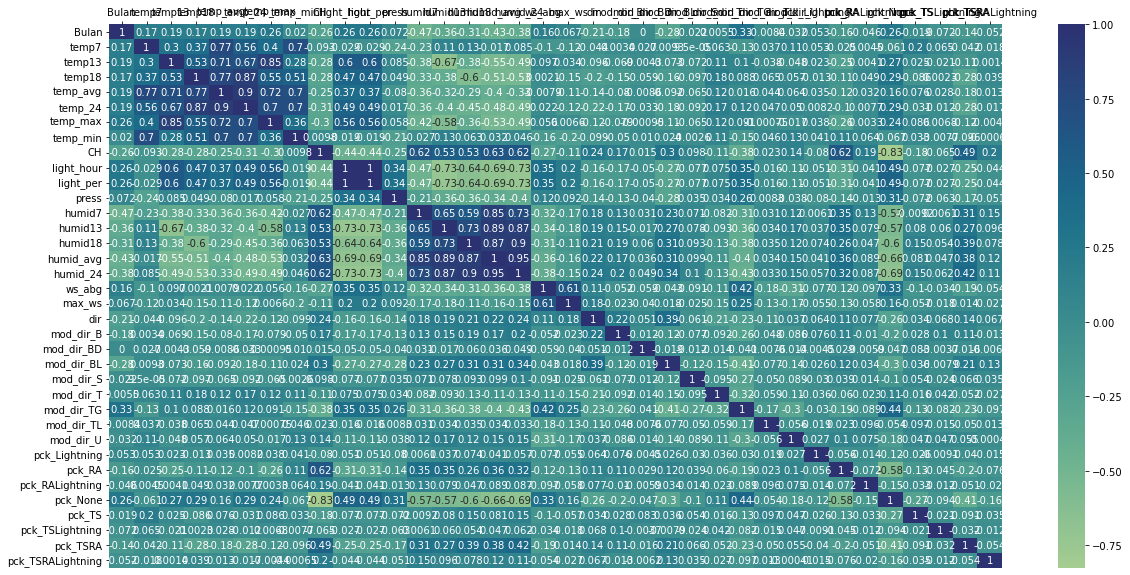

In [117]:
fig, size = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(corr_df2.corr(method="spearman"), annot=True, cmap="crest", ax=size) #spearman
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [118]:
corr_CH = pd.DataFrame(corr_df2.corrwith(corr_df2["CH"], method='spearman').sort_values())
corr_CH

,0
pck_None,-0.826615
light_per,-0.435565
light_hour,-0.435565
mod_dir_TG,-0.384458
temp_24,-0.307873
temp_max,-0.304257
temp18,-0.279444
temp13,-0.279322
ws_abg,-0.269925
Bulan,-0.260462


In [119]:
# 0.3 is used for illustration 
# replace with your actual value
thresh = 0.4

mask = corr_CH.abs() > thresh
# or mask = coeff < thresh

corr_CH.where(mask).stack()

pck_None    0   -0.826615
light_per   0   -0.435565
light_hour  0   -0.435565
pck_TSRA    0    0.487197
humid13     0    0.527012
humid18     0    0.531523
pck_RA      0    0.616398
humid7      0    0.620337
humid_24    0    0.622988
humid_avg   0    0.634803
CH          0    1.000000
dtype: float64

# Forecasting

In [120]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

## CH besok

In [121]:
#Curah Hujan Besok
df3 = df2
df3['ch_besok'] = df3.shift(-1)['CH']
df3 = df3.iloc[:-1,:].copy()

## CH lusa

In [122]:
# df3['ch_besok2'] = df3.shift(-2)['CH']
# df3 = df3.iloc[:-2,:].copy()

## CH 3 hari kedepan

In [123]:
# df3['ch_besok3'] = df3.shift(-3)['CH']
# df3 = df3.iloc[:-3,:].copy()

In [124]:
df3

,Tahun,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,...,mod_dir_U,pck_Lightning,pck_RA,pck_RALightning,pck_None,pck_TS,pck_TSLightning,pck_TSRA,pck_TSRALightning,ch_besok
0,2019,1,1.0,27.4,33.2,29.8,29.5,29.7,33.8,26.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00
1,2019,1,2.0,28.2,34.4,26.0,29.2,28.5,34.8,25.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.50
2,2019,1,3.0,25.4,31.3,26.6,27.2,27.2,31.7,24.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60
3,2019,1,4.0,25.4,31.4,29.6,28.0,28.3,32.1,25.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.90
4,2019,1,5.0,27.6,33.0,30.6,29.7,29.7,33.4,26.8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2021,12,26.0,27.5,34.0,26.8,29.0,28.4,35.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.30
1085,2021,12,27.0,27.9,34.7,25.9,29.1,27.2,35.7,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.90
1086,2021,12,28.0,26.4,33.6,27.4,28.5,27.7,35.8,25.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.80
1087,2021,12,29.0,26.3,32.7,30.4,28.9,29.0,34.0,26.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00


In [125]:
corr_CH = pd.DataFrame(df3.corrwith(df3["ch_besok"], method='spearman').sort_values())
thresh = 0.5
mask = corr_CH.abs() > thresh
corr_CH.where(mask).stack()

pck_None    0   -0.601333
light_per   0   -0.502403
light_hour  0   -0.502403
CH          0    0.506746
pck_TSRA    0    0.519518
humid13     0    0.543345
humid_avg   0    0.623953
humid18     0    0.632478
humid_24    0    0.707581
ch_besok    0    1.000000
dtype: float64

In [126]:
# corr_CH = pd.DataFrame(df3.corrwith(df3["ch_besok2"], method='spearman').sort_values())
# thresh = 0.4
# mask = corr_CH.abs() > thresh
# corr_CH.where(mask).stack()

In [127]:
# corr_CH = pd.DataFrame(df3.corrwith(df3["ch_besok3"], method='spearman').sort_values())
# thresh = 0.4
# mask = corr_CH.abs() > thresh
# corr_CH.where(mask).stack()

In [128]:
#create train and test dataset
split_date = pd.datetime(2021,6 ,1)

# df_training = df.loc[df['Date'] <= split_date]
# df_test = df.loc[df['Date'] > split_date]

train = df3.loc[df3['date'] < split_date]
test = df3.loc[df3['date'] >= split_date]

# fig, ax = plt.subplots(figsize=(15,5))
# train.plot()
# test.plot()
# plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [129]:
df3.columns

Index(['Tahun', 'Bulan', 'tgl', 'temp7', 'temp13', 'temp18', 'temp_avg',
       'temp_24', 'temp_max', 'temp_min', 'CH', 'light_hour', 'light_per',
       'pck', 'tgl.1', 'press', 'humid7', 'humid13', 'humid18', 'humid_avg',
       'humid_24', 'ws_abg', 'mod_dir', 'max_ws', 'dir', 'date', 'mod_dir_B',
       'mod_dir_BD', 'mod_dir_BL', 'mod_dir_S', 'mod_dir_T', 'mod_dir_TG',
       'mod_dir_TL', 'mod_dir_U', 'pck_Lightning', 'pck_RA', 'pck_RALightning',
       'pck_None', 'pck_TS', 'pck_TSLightning', 'pck_TSRA',
       'pck_TSRALightning', 'ch_besok'],
      dtype='object')

In [130]:
# fitur = ['pck_None', 'light_per', 'light_hour', 'pck_TSRA','humid13', 'humid18', 'pck_RA', 'humid7', 'humid_24', 'humid_avg' ]
# fitur = ['pck_None', 'light_per', 'light_hour','temp_24', 'temp18', 'mod_dir_TG', 'humid7', 'CH', 'pck_TSRA','humid13', 'humid18', 'humid_24', 'humid_avg' ]
fitur = ['pck_None', 'pck_TSRA','humid13', 'humid18', 'pck_RA', 'humid7', 'humid_24', 'humid_avg' ]
""" 
pck_None    0   -0.601333
light_per   0   -0.502403
light_hour  0   -0.502403
temp_24     0   -0.430938
temp18      0   -0.404957
mod_dir_TG  0   -0.402750
humid7      0    0.436156
CH          0    0.506746
pck_TSRA    0    0.519518
humid13     0    0.543345
humid_avg   0    0.623953
humid18     0    0.632478
humid_24    0    0.707581
ch_besok    0    1.000000


From the correlation we have calculated :
for corr >0.4
pck_None    0   -0.826615
light_per   0   -0.435565
light_hour  0   -0.435565
pck_TSRA    0    0.487197
humid13     0    0.527012
humid18     0    0.531523
pck_RA      0    0.616398
humid7      0    0.620337
humid_24    0    0.622988
humid_avg   0    0.634803
CH          0    1.000000

if >0.5

pck_None   0   -0.826615
humid13    0    0.527012
humid18    0    0.531523
pck_RA     0    0.616398
humid7     0    0.620337
humid_24   0    0.622988
humid_avg  0    0.634803
CH         0    1.000000
"""

target = 'ch_besok'
# target2 = 'ch_besok2'
# target3 = 'ch_besok3'

In [131]:
X_train = train[fitur]
y_train = train[target]

# y_train2 = train[target2]
# y_train3 = train[target3]


X_test = test[fitur]
y_test = test[target]

# y_test2 = test[target2]
# y_test3 = test[target3]

## Continue to Prediction

In [132]:
# pembentukan prediksi model dengan xgboost. squared error memberikan hasil yang lebih ekstrim. pseudohubererror memberikan hasil yang lebih aman namun tidak dapat memberikan nilai tinggi ketika prediksi curah hujan yang sebenarnya tinggi.
# reg = xgb.XGBRegressor(objective='reg:pseudohubererror', n_estimators=1000, early_stopping_rounds=50)

reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50)

reg.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=True)

[0]	validation_0-rmse:11.49338	validation_1-rmse:10.75885
[1]	validation_0-rmse:9.68855	validation_1-rmse:10.12011
[2]	validation_0-rmse:8.23462	validation_1-rmse:9.89932
[3]	validation_0-rmse:7.23638	validation_1-rmse:9.36967
[4]	validation_0-rmse:6.53698	validation_1-rmse:9.43246
[5]	validation_0-rmse:5.90636	validation_1-rmse:9.59476
[6]	validation_0-rmse:5.48220	validation_1-rmse:9.68019
[7]	validation_0-rmse:5.04952	validation_1-rmse:9.71196
[8]	validation_0-rmse:4.64508	validation_1-rmse:9.81243
[9]	validation_0-rmse:4.32724	validation_1-rmse:9.78892
[10]	validation_0-rmse:4.11152	validation_1-rmse:9.84484
[11]	validation_0-rmse:3.88371	validation_1-rmse:9.86992
[12]	validation_0-rmse:3.70306	validation_1-rmse:9.81330
[13]	validation_0-rmse:3.57203	validation_1-rmse:9.91800
[14]	validation_0-rmse:3.36972	validation_1-rmse:9.86013
[15]	validation_0-rmse:3.26543	validation_1-rmse:9.88195
[16]	validation_0-rmse:3.14328	validation_1-rmse:9.87088
[17]	validation_0-rmse:3.03536	validat

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [133]:
# reg2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50)

# reg2.fit(X_train, y_train2,
#        eval_set=[(X_train, y_train2), (X_test, y_test2)],
#        verbose=True)

In [134]:
# reg3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50)

# reg3.fit(X_train, y_train3,
#        eval_set=[(X_train, y_train3), (X_test, y_test3)],
#        verbose=True)

# Feature Importance

In [135]:
fi = pd.DataFrame(data=reg.feature_importances_,
index=reg.feature_names_in_,
columns=['importance'])

# fi2 = pd.DataFrame(data=reg2.feature_importances_,
# index=reg2.feature_names_in_,
# columns=['importance'])

# fi3 = pd.DataFrame(data=reg3.feature_importances_,
# index=reg3.feature_names_in_,
# columns=['importance'])

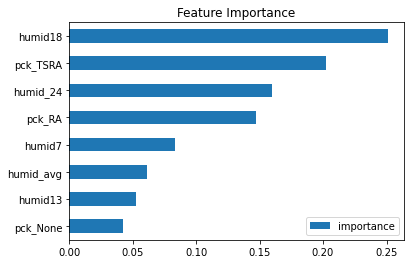

In [136]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# fi2.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

# fi3.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

# Forecast on Test

In [137]:
test['prediksi'] = reg.predict(X_test)
df3_pred = df3.merge(test[['prediksi']], how='left', left_index=True, right_index=True)

# test['prediksi2'] = reg2.predict(X_test)
# df3_pred = df3_pred.merge(test[['prediksi2']], how='left', left_index=True, right_index=True)

# test['prediksi3'] = reg3.predict(X_test)
# df3_pred = df3_pred.merge(test[['prediksi3']], how='left', left_index=True, right_index=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
df3_pred

,Tahun,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,...,pck_Lightning,pck_RA,pck_RALightning,pck_None,pck_TS,pck_TSLightning,pck_TSRA,pck_TSRALightning,ch_besok,prediksi
0,2019,1,1.0,27.4,33.2,29.8,29.5,29.7,33.8,26.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,NaN
1,2019,1,2.0,28.2,34.4,26.0,29.2,28.5,34.8,25.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.50,NaN
2,2019,1,3.0,25.4,31.3,26.6,27.2,27.2,31.7,24.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60,NaN
3,2019,1,4.0,25.4,31.4,29.6,28.0,28.3,32.1,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.90,NaN
4,2019,1,5.0,27.6,33.0,30.6,29.7,29.7,33.4,26.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2021,12,26.0,27.5,34.0,26.8,29.0,28.4,35.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.30,9.589535
1085,2021,12,27.0,27.9,34.7,25.9,29.1,27.2,35.7,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.90,21.483646
1086,2021,12,28.0,26.4,33.6,27.4,28.5,27.7,35.8,25.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.80,9.349683
1087,2021,12,29.0,26.3,32.7,30.4,28.9,29.0,34.0,26.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,4.910157


In [139]:
# ax = df3_pred[['CH']].plot(figsize=(15, 5))
# df3_pred['prediksi'].plot(ax=ax)
# plt.legend(['Data sebenarnya','prediksi'])
# ax.set_title('Perbandingan prediksi dengan data sebenarnya')
# plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


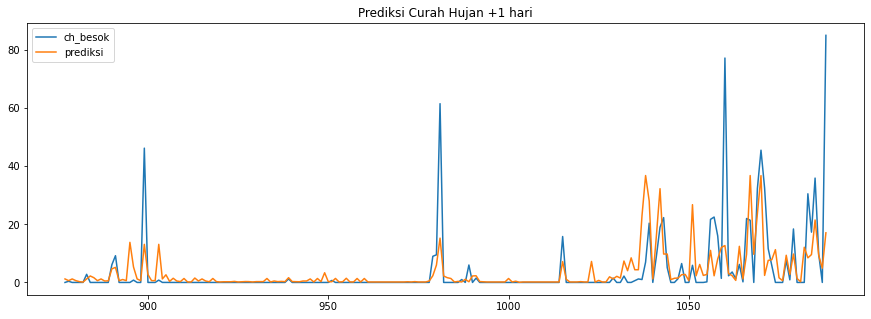

In [140]:
split_date = pd.datetime(2021,6,1)

# df_training = df.loc[df['Date'] <= split_date]
# df_test = df.loc[df['Date'] > split_date]
df3_pred[['ch_besok', 'prediksi']].loc[df3_pred['date'] > split_date].plot(figsize=(15, 5), title = 'Prediksi Curah Hujan +1 hari')
# df3_pred[['ch_besok', 'prediksi2']].loc[df3_pred['date'] > split_date].plot(figsize=(15, 5), title = 'Prediksi Curah Hujan +2 hari')
# df3_pred[['ch_besok', 'prediksi3']].loc[df3_pred['date'] > split_date].plot(figsize=(15, 5), title = 'Prediksi Curah Hujan +3 hari')
plt.show()

In [141]:
df3['CH'].max()

101.8

In [142]:
y_pred = test['prediksi']
from sklearn.metrics import r2_score
r2_score(y_test, test['prediksi'])

#.tail(183)

0.3277254559431996

In [143]:
import numpy as np
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
mae = np.mean(np.abs(y_pred - y_test))
mpe = np.mean((y_pred - y_test)/y_test)
rmse = np.mean((y_pred - y_test)**2)**0.5
corr = np.corrcoef(y_pred, y_test)[0,1]

mins = np.amin(np.hstack([y_pred[:,None], y_test[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_test[:,None]]), axis=1)
minmax = 1-np.mean(mins/maxs)

import pprint
pprint.pprint({'mape' : mape, 'mae':mae,
              'mpe':mpe, 'rmse':rmse,
              'corr':corr, 'minmax':minmax})

{'corr': 0.5733957778296283,
 'mae': 3.650804542675264,
 'mape': inf,
 'minmax': 0.8795816461290394,
 'mpe': inf,
 'rmse': 9.369668171843818}


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == "__main__":


In [144]:
#MASE (cek kembali apakah bisa digunakan untuk forecasting selain ARIMA)
n = np.array(y_test).shape[0]
d = np.abs(np.diff(np.array(y_test))).sum()/(n-1)

errors = np.abs(y_test - y_pred)
print(errors.mean()/d)

0.7715786691727206


Note : coba menggunakan Kalman FIlter https://medium.com/data-science-in-your-pocket/time-series-forecasting-using-kalman-filter-814e9171d780

# Menggunakan model ARIMA

In [145]:

from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [146]:
ad_test(df2['CH'])

1. ADF :  -4.486942768462169
2. P-Value :  0.00020760294372134208
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1068
5. Critical Values :
	 1% :  -3.436487721786906
	 5% :  -2.8642500182800266
	 10% :  -2.568212912125293


In [147]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

NameError: name 'data' is not defined

Hasil menyatakan bahwa data stasioner (0.0002 < 0.05)

## Arima Model

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dfar = df2
dfar['ch_besok'] = dfar.shift(-1)['CH']
dfar = dfar.iloc[:-1,:].copy()

In [ ]:
fitur = ['date', 'pck_None', 'light_per', 'light_hour', 'pck_TSRA','humid13', 'humid18', 'pck_RA', 'humid7', 'humid_24', 'humid_avg', 'ch_besok' ]
dfar = dfar[fitur]
stepwise_fit = auto_arima(dfar['ch_besok'], trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#create train and test dataset
split_date = pd.datetime(2021,6 ,1)

train = dfar.loc[dfar['date'] < split_date]
test = dfar.loc[dfar['date'] >= split_date]


In [ ]:
train['ch_besok']

In [ ]:
model=ARIMA(dfar['ch_besok'], order=(4,0,1))
history = model.fit()
history.summary()
    

In [ ]:
# import statsmodels.api as sm
# model = sm.tsa.statespace.SARIMAX(train['ch_besok'], order=(1,1,1))
# model = model.fit()
# model.summary()

In [ ]:
start = len(train)
end=len(train)+len(test)-1
pred=history.predict(start=start, end=end, typ = 'levels')
pred

In [ ]:
# dfar_pred = test.merge(pred, how='left', left_index=True, right_index=True)

In [ ]:
test['ch_besok'].plot(legend=True)
pred.plot(legend=True)


In [ ]:
test['ch_besok'].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['ch_besok']))
print(rmse)

Hasil ARIMA kurang bagus. model perlu diperbaiki. Hal ini diduga dikarenakan banyaknya outlier.